## The prediction whether or not a passenger survived on Titanic
#### DAHAMOU ABDELILAH

#### Import libraires

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 9)
import os


In [64]:
df = pd.read_csv('train.csv')

In [65]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S
9,9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,D2969,C


In [66]:
df.Ticket.sample(20)

6149               30226
49369              41857
9093               17663
72579              29046
91686            4133844
4355      SC/PARIS 23936
20342             212865
80085    SC/PARIS 385722
18685              12996
25641              27913
36915               6969
5094              392933
24984       W./C. 453604
87052              12798
85452          A. 216254
43719                NaN
70989             381530
85959              10876
61338              23082
36558             421226
Name: Ticket, dtype: object

In [67]:
t_df = df.groupby('Ticket').Survived.agg(['count', 'mean']).sort_values('count', ascending=False)
t_df

,count,mean
Ticket,,
A/5,602,0.363787
C.A.,177,0.389831
SC/PARIS,145,0.448276
SOTON/O.Q.,80,0.337500
SC,57,0.491228
...,...,...
402718,1,1.000000
4027198,1,0.000000
4027354,1,0.000000


In [68]:
df['FamilyName'] = df.Name.apply(lambda x : x.split(',')[0])
df['FirstName'] = df.Name.apply(lambda x : x.split(',')[1])

t_df = df.groupby('FamilyName').Survived.agg(['count', 'mean']).sort_values('count', ascending=False)
t_df[(t_df['count'] > 1) & (t_df['count'] < 10)]

,count,mean
FamilyName,,
Clemens,9,0.666667
Louis,9,0.333333
Toney,9,0.555556
Clement,9,0.333333
Kenny,9,0.555556
...,...,...
Grothe,2,0.000000
Cerrone,2,0.500000
States,2,0.000000


In [69]:
t_df = df.groupby('FirstName').Survived.agg(['count', 'mean']).sort_values('count', ascending=False)
t_df[(t_df['count'] > 1) & (t_df['count'] < 20)]

,count,mean
FirstName,,
Delia,19,0.578947
Antoinette,19,0.736842
Woodrow,19,0.105263
Genevieve,19,0.842105
Candice,19,0.789474
...,...,...
Leonora,2,0.500000
Sunshine,2,0.500000
Alena,2,1.000000


In [70]:
df.groupby('Sex').Survived.mean()

Sex
female    0.711525
male      0.205795
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='Age'>

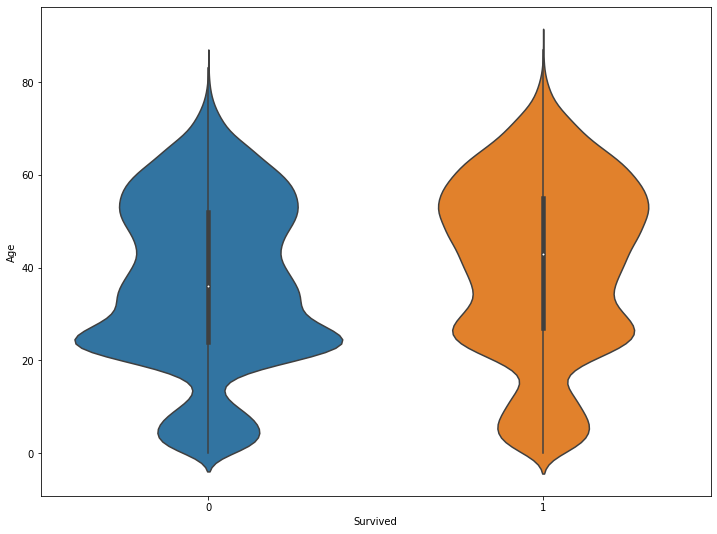

In [71]:
import seaborn as sns
sns.violinplot(x='Survived', y='Age', data=df)

In [72]:
df.groupby('Pclass').Survived.mean()

Pclass
1    0.579779
2    0.525018
3    0.247305
Name: Survived, dtype: float64

In [73]:
df[df.Parch > 0].Survived.mean()

0.49036281179138325

In [74]:
df[df.Parch == 0].Survived.mean()

0.40520805004079413

In [75]:
df.corr()[['Survived']].T

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,0.001956,1.0,-0.289723,0.103895,-0.007587,0.023352,0.187534


In [76]:
df[df.SibSp > 2].Survived.mean()

0.38130609718353453

In [77]:
df[df.SibSp == 0].Survived.mean()

0.426842909368691

In [78]:
df.groupby('Embarked').Survived.mean().to_frame()

,Survived
Embarked,
C,0.751296
Q,0.596976
S,0.315294


In [79]:
df['CabinLetter'] = df.Cabin.apply(lambda x : x[0] if not pd.isna(x) else x)
df.groupby('CabinLetter').Survived.agg(['count', 'mean'])

,count,mean
CabinLetter,,
A,6307,0.274616
B,7439,0.630192
C,11825,0.712220
D,3637,0.732197
E,1749,0.617496
F,663,0.837104
G,482,0.836100
T,32,0.437500


## Pre-processing

In [80]:
import re
def extract_ticket_prefix(ticket):
    if pd.isna(ticket):
        return ticket
    first_digit_search = re.search(r'\d', ticket)
    if first_digit_search:
        return ticket[:first_digit_search.span()[0]].strip()
    return None

def preprocess_dataframe(df):
    df = df.copy()
    df['CabinLetter'] = df.Cabin.apply(lambda v : v if pd.isna(v) else v[0])
    df['FamilyId'] = df.Name.str.lower().str.split(', ').str[0] + df.CabinLetter + df.Embarked + df.Pclass.astype(str)
    df['TicketPrefix'] = df.Ticket.apply(extract_ticket_prefix)
    df['FirstName'] = df.Name.str.split(' ').apply(lambda vs : vs[1].lower())
    df['Pclass'] = df['Pclass'].astype(str)
    return df

df = pd.read_csv('train.csv')
df = preprocess_dataframe(df)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinLetter,FamilyId,TicketPrefix,FirstName
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,C,oconnorCS1,,frankie
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,NaN,NaN,,drew
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,NaN,NaN,CA,kenneth
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,NaN,NaN,A.,james
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,NaN,NaN,,michael
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S,NaN,NaN,,jonathan
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S,NaN,NaN,A/,jose
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S,NaN,NaN,,linda
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S,A,wardlawAS1,,michael
9,9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,D2969,C,D,greigoDC2,,rudy


## Train the Survival Prediction Model.

In [81]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.25, random_state=0)
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinLetter,FamilyId,TicketPrefix,FirstName
25571,25571,1,2,"Campbell, Lisha",female,34.0,0,0,50286,26.14,NaN,S,NaN,NaN,,lisha
69359,69359,0,3,"Hosey, Robert",male,33.0,0,0,4086372,7.08,NaN,S,NaN,NaN,,robert
40154,40154,0,3,"Moran, Eric",male,29.0,0,0,SC/PARIS 11732,7.29,NaN,S,NaN,NaN,SC/PARIS,eric
91291,91291,0,3,"Zayas, Donald",male,25.0,0,0,3907946,12.79,NaN,S,NaN,NaN,,donald
92941,92941,0,1,"Payne, Hazel",female,24.0,0,2,469981,13.60,A17768,C,A,payneAC1,,hazel


In [82]:
df_test.shape

(25000, 16)

In [83]:
NUMERIC_FEATURES = ['Age', 'SibSp', 'Parch', 'Fare']
num_df = df_train[NUMERIC_FEATURES].copy()
num_df.loc[num_df['Age'].isna(), 'Age'] = num_df['Age'].mean()
num_df

,Age,SibSp,Parch,Fare
2606,38.407101,0,0,29.45
57228,32.000000,0,0,594.89
8382,41.000000,2,1,61.83
60281,52.000000,0,0,31.26
48432,23.000000,0,0,6.57
...,...,...,...,...
21243,70.000000,0,0,10.74
45891,61.000000,1,2,66.32
42613,34.000000,2,2,27.76
43567,22.000000,2,0,231.10


In [84]:
from sklearn.preprocessing import OneHotEncoder

CATEGORICAL_FEATURES = ['Pclass', 'Sex', 'Embarked', 'CabinLetter']
cat_df = df_train[CATEGORICAL_FEATURES].copy()
cat_df

,Pclass,Sex,Embarked,CabinLetter
2606,3,male,Q,NaN
57228,1,female,C,C
8382,1,male,S,NaN
60281,1,male,S,NaN
48432,2,male,S,NaN
...,...,...,...,...
21243,3,female,C,NaN
45891,1,female,S,A
42613,3,male,S,NaN
43567,1,male,C,C


In [85]:
one_hot_encoder = OneHotEncoder(drop='first')
cat_features = one_hot_encoder.fit_transform(cat_df).todense()
pd.DataFrame(cat_features, columns=one_hot_encoder.get_feature_names())

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_2,x0_3,x1_male,x2_Q,x2_S,x2_nan,x3_B,x3_C,x3_D,x3_E,x3_F,x3_G,x3_T,x3_nan
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74997,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)
scaled_df

,Age,SibSp,Parch,Fare
0,1.578824e-15,-0.460985,-0.474493,-0.208454
1,-3.559141e-01,-0.460985,-0.474493,7.917656
2,1.440354e-01,1.858942,0.573354,0.256889
3,7.550847e-01,-0.460985,-0.474493,-0.182442
4,-8.558635e-01,-0.460985,-0.474493,-0.537269
...,...,...,...,...
74995,1.754984e+00,-0.460985,-0.474493,-0.477341
74996,1.255034e+00,0.698979,1.621200,0.321416
74997,-2.448142e-01,1.858942,1.621200,-0.232741
74998,-9.114134e-01,1.858942,-0.474493,2.689519


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df_train, df_test = train_test_split(df, test_size=0.25, random_state=0)


def fit_transformers(df_train):
    one_hot_encoder = OneHotEncoder(drop='first')
    one_hot_encoder.fit(df_train[CATEGORICAL_FEATURES])
    scaler = StandardScaler()
    scaler.fit(compute_features(df_train, one_hot_encoder, scaler=None))
    return scaler, one_hot_encoder

def compute_features(df, one_hot_encoder, scaler):
    df = preprocess_dataframe(df)
    cat_features = one_hot_encoder.transform(df[CATEGORICAL_FEATURES])
    cat_df = pd.DataFrame(cat_features.todense(), columns=one_hot_encoder.get_feature_names()).reset_index(drop=True)
    num_df = df[NUMERIC_FEATURES].reset_index(drop=True)
    num_df['Age'] = num_df['Age'].fillna(38.0)
    num_df['Fare'] = num_df['Fare'].fillna(44)
    features = pd.concat([num_df, cat_df], axis=1)
    if scaler:
        features = pd.DataFrame(scaler.transform(features), columns=features.columns)
    return features

scaler, one_hot_encoder = fit_transformers(df_train)

X_train = compute_features(df_train, one_hot_encoder, scaler)
y_train = df_train.Survived

X_test = compute_features(df_test, one_hot_encoder, scaler)
y_test = df_test.Survived

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [88]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

model = XGBClassifier()
baseline = DummyClassifier(strategy='most_frequent')

model.fit(X_train, y_train)
baseline.fit(X_train, y_train)

c:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\HP\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:48:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


DummyClassifier(strategy='most_frequent')

In [89]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     14269
           1       0.74      0.72      0.73     10731

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.77      0.77      0.77     25000



In [90]:
print(classification_report(y_test, baseline.predict(X_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73     14269
           1       0.00      0.00      0.00     10731

    accuracy                           0.57     25000
   macro avg       0.29      0.50      0.36     25000
weighted avg       0.33      0.57      0.41     25000



In [91]:
model.predict(X_test)

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

## Submission

In [92]:
# Train the model on all training data.
sub_train_df = pd.read_csv('train.csv')
sub_train_df = preprocess_dataframe(sub_train_df)
scaler, one_hot_encoder = fit_transformers(sub_train_df)

X_train = compute_features(sub_train_df, one_hot_encoder, scaler)
y_train = sub_train_df.Survived

model.fit(X_train, y_train)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation

[15:48:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
# Run inference on the test dataset and create a submission.
sub_test_df = pd.read_csv('test.csv')
X_test = compute_features(sub_test_df, one_hot_encoder, scaler)

submission_df = sub_test_df[['PassengerId']].copy()
submission_df['Survived'] = model.predict(X_test)
submission_df.head(10)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,PassengerId,Survived
0,100000,0
1,100001,1
2,100002,1
3,100003,0
4,100004,1
5,100005,0
6,100006,1
7,100007,0
8,100008,0
9,100009,0


In [94]:
submission_df.to_csv('submission.csv', index=False)

In [95]:
submission_df

,PassengerId,Survived
0,100000,0
1,100001,1
2,100002,1
3,100003,0
4,100004,1
...,...,...
99995,199995,1
99996,199996,0
99997,199997,0
99998,199998,1


### FIN